In [1]:
# Load libraries
import numpy as np

# Machine learning
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense, Activation
from sklearn import preprocessing

# Tensor operations
import tensorflow as tf
import keras.backend as K

# Visualization
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(0)

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
!pip show tensorflow

Name: tensorflow
Version: 1.13.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /anaconda3/lib/python3.7/site-packages
Requires: wheel, keras-applications, tensorflow-estimator, grpcio, astor, six, tensorboard, keras-preprocessing, absl-py, protobuf, termcolor, numpy, gast
Required-by: 


In [3]:
# mean and standard deviation
mu, sigma = 0, 1 

# synthetic data dimensions
a = 60
b = 40

# data X
x = np.arange(-2, 5, 7/(a+b))

# data Y with random noise
o = 2*x[:a] + 0.1 * np.random.normal(mu, sigma, a)
t = np.random.uniform(10, 22, b)
y = np.concatenate((o, t), axis=None)

# test data
test_x = x

o = 2*x[:a] + 0.1 * np.random.normal(mu, sigma, a)
t = np.random.uniform(10, 22, b)
test_y = np.concatenate((o, t), axis=None)

# sample weights
s = (y > 5).astype('float32')

In [4]:
# Start neural network
network = Sequential()

# Add fully connected layer with a ReLU activation function
network.add(Dense(units=16, activation='relu', input_shape=(1, )))

# Add dropout layer
# network.add(Dropout(0.2))

# Add fully connected layer with a ReLU activation function
network.add(Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(Dense(units=1, activation='linear'))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
def custom_loss(y_true, y_pred):
    z = y_pred - y_true
    g = y_pred - 10
    #return K.mean(K.square(z), axis=-1)
    #return K.mean(K.square(z) + K.relu(-g), axis=-1)
    #return K.mean((1-s)*K.square(z), axis=-1)
    return K.mean(s*K.relu(-g), axis=-1)
    #return K.mean((1-s)*K.square(z) + s*K.relu(-g), axis=-1)

In [6]:
# Compile neural network
network.compile(loss=custom_loss, # Custom
                optimizer='sgd',  # Root Mean Square Propagation
                metrics=['mse'])  # Accuracy performance metric

In [7]:
# Train neural network
history = network.fit(x,             # Features
                      y,             # Target
                      epochs=50,    # Number of epochs
                      verbose=0,     # No output
                      batch_size=10, # Number of observations per batch
                      validation_data=(test_x, test_y)) # Data for evaluation

Instructions for updating:
Use tf.cast instead.


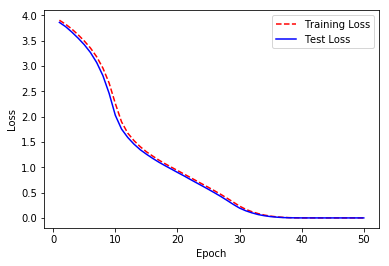

In [8]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [9]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


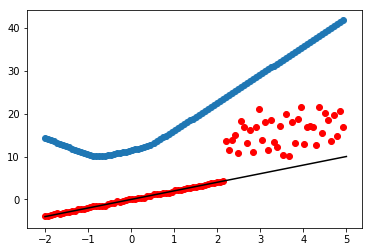

In [10]:
plt.scatter(x, network.predict(x))
plt.scatter(x, y, color='red')
plt.plot([-2, 5], [-4, 10], color='k')
plt.show()

In [11]:
network.evaluate(np.linspace(1.0, 20.0, num=100), np.linspace(1.0, 20.0, num=100), batch_size=32)

100/100 [==============================] - 0s 55us/step


[0.0, 5519.497578125]

In [12]:
network.evaluate(np.linspace(1.0, 10.0, num=100), np.linspace(1.0, 10.0, num=100), batch_size=32)

100/100 [==============================] - 0s 104us/step


[0.0, 1808.07552734375]